In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
np.random.seed(1)
tf.random.set_seed(346)

# load json and create model
json_file = open('../outputs/model_model_A.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('../outputs/model_model_A.h5')

# evaluate loaded model on test data
opt = keras.optimizers.SGD(learning_rate=0.01)
loaded_model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [3]:
#train = np.zeros((10000*10,51,153))
test = np.zeros((1000*10,51,153))

#train_targ = np.zeros((10000*10))
test_targ = np.zeros((1000*10))

#train_ID = np.zeros((10000*10))
test_ID = np.zeros((1000*10))

#init_len_tr = 0
init_len_te = 0
for ii in range(10):
    test_full= np.load('../data/data_split/test%d'%ii+'.npy') 
     
    test_targ_full= np.load('../data/data_split/test_targ_%d'%ii+'.npy')
    
    test_ID_full= np.load('../data/data_split/test_ID_%d'%ii+'.npy') 
    
    np.random.seed(3)
    random_index_test = np.random.choice(len(test_full), size=1000, replace=False)

    
    tests = test_full[random_index_test,:,:]
    test[init_len_te:init_len_te+len(random_index_test)] = tests
    
    tests_targ = test_targ_full[random_index_test]
    test_targ[init_len_te:init_len_te+len(random_index_test)] = tests_targ
    
    tests_id = test_ID_full[random_index_test]
    test_ID[init_len_te:init_len_te+len(random_index_test)] = tests_id
    
    init_len_te = init_len_te + len(random_index_test)
    

    test_full = None
    test_targ_full = None
    test_ID_full = None
    tests = None
    tests_id = None
    
    print("Done with {}".format(ii))

Done with 0
Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9


In [52]:
index_test = np.arange(len(test))
np.random.seed(7)
np.random.shuffle(index_test)
test = test[index_test,:,:]
test_targ = test_targ[index_test]
test_ID = test_ID[index_test]

In [53]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 47, 149, 16)       416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 70, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 35, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 31, 64)         51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 15, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)             

In [65]:
feat_te2 = test.reshape(len(test), 51, 153, 1)
test_ID = test_ID.astype(int)
test_targ = test_targ.astype(int)

# -- data frame ID and Object_type
df_test = pd.DataFrame({'ID':test_ID, 'OBJECT_TYPE':test_targ})

y_pred_test = loaded_model.predict(feat_te2)
df_test["predicted"] = np.argmax(y_pred_test,axis=1)

# --extract the hidden layer for layer1 = Conv16
get_1rd_layer_output = tf.keras.backend.function([loaded_model.layers[0].input],
                                  [loaded_model.layers[0].output])
# --input = 0 type
layer_output = get_1rd_layer_output([feat_te2])

In [ ]:
[0.9, 0.1]

In [73]:
df_test

,ID,OBJECT_TYPE,predicted
0,8272628,0,0
1,8834310,0,0
2,11719980,1,1
3,10480170,0,0
4,9376777,1,1
...,...,...,...
9995,11377777,0,0
9996,8462804,1,1
9997,8192829,1,1
9998,11542754,1,1


In [98]:
df_test.loc[500]["predicted"]

0

In [55]:
# -- shape
layer_output[0].shape

(10000, 47, 149, 16)

10859041


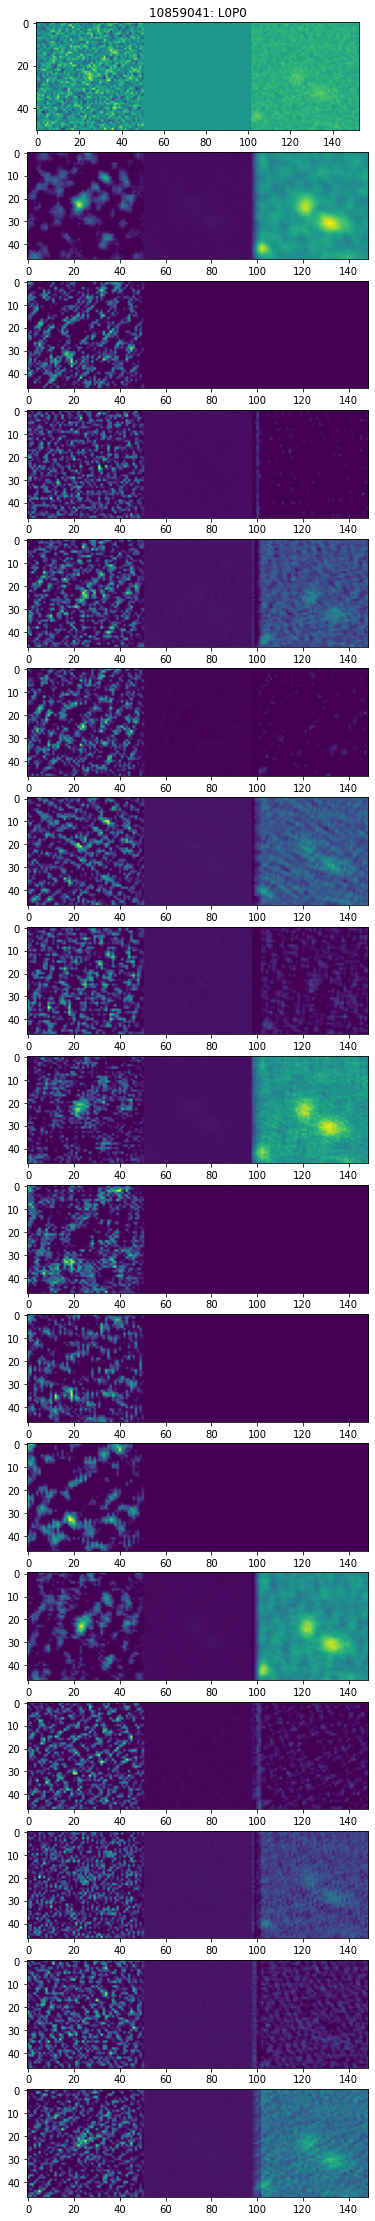

In [104]:
fig, ax = plt.subplots(17,1, figsize = (40,40))
print("{}".format(int(test_ID[500])))
ax[0].imshow(feat_te2[500])
ax[0].set_title("{}: L{}P{}".format(int(test_ID[500]),int(test_targ[500]),
                                    df_test.loc[500]["predicted"]))
for i in range(16):
    ax[i+1].imshow(layer_output[0][500,:,:,i])
    
# ~0: white

11719980


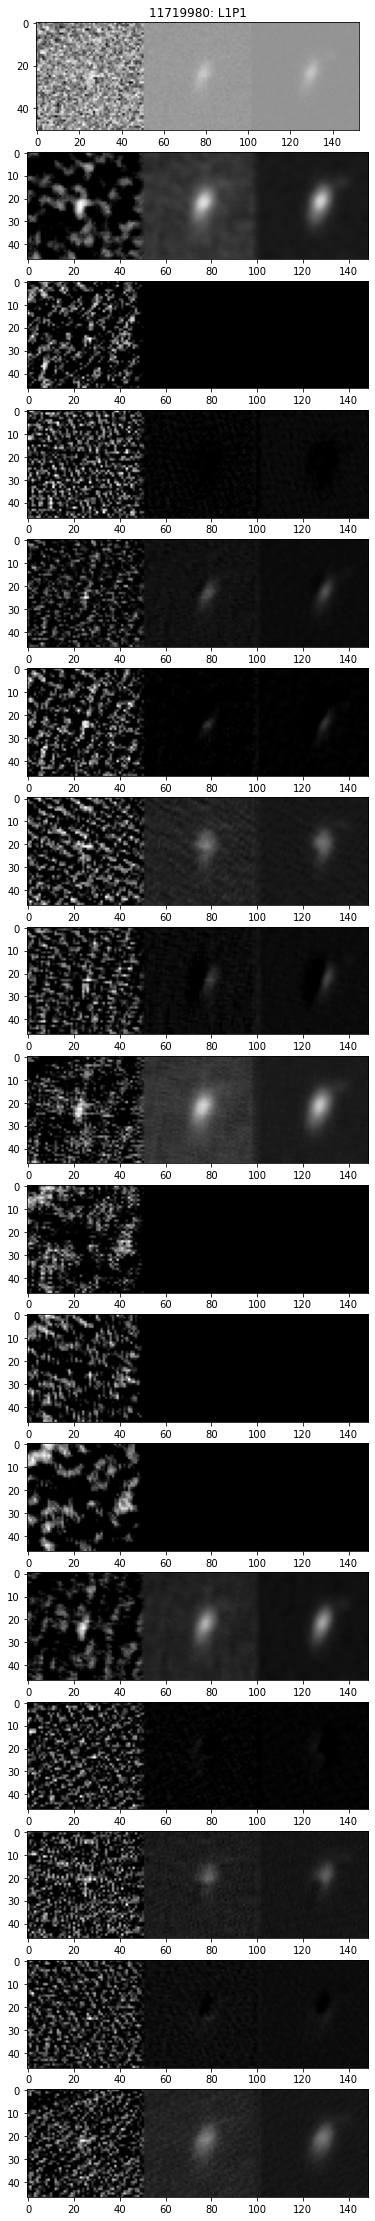

In [102]:
fig, ax = plt.subplots(17,1, figsize = (40,40))
print("{}".format(int(test_ID[2])))
ax[0].imshow(feat_te2[2],cmap="Greys_r")
ax[0].set_title("{}: L{}P{}".format(int(test_ID[2]),int(test_targ[2]),
                                    df_test.loc[2]["predicted"]))
for i in range(16):
    ax[i+1].imshow(layer_output[0][2,:,:,i],cmap="Greys_r")
    
# ~0: white

In [ ]:
random_index_test